In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd drive/MyDrive/Datasets/

/content/drive/MyDrive/Datasets


In [ ]:
!pip install scikit-plot

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree,svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve,auc,recall_score,precision_score
from sklearn.ensemble import RandomForestClassifier
import scikitplot as skplt
%matplotlib inline

In [ ]:
data = pd.read_csv('spotify_data.csv')
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [ ]:
train, test = train_test_split(data, test_size =0.25)

In [ ]:
features = ['tempo', 'danceability', 'duration_ms', 
            'loudness', 'speechiness', 'valence', 
            'energy', 'acousticness', 'key', 
            'instrumentalness'] 

In [ ]:
X_train = train[features]
y_train = train["target"]

X_test = test[features]
y_test = test["target"]

In [ ]:
X_train.head()

,tempo,danceability,duration_ms,loudness,speechiness,valence,energy,acousticness,key,instrumentalness
1689,109.781,0.585,216760,-5.424,0.0302,0.615,0.757,0.006430,4,0.0000
1324,132.973,0.491,309734,-3.866,0.0938,0.140,0.928,0.000102,9,0.3630
178,110.983,0.787,273853,-5.379,0.0324,0.867,0.658,0.010800,8,0.0152
1932,161.109,0.514,254027,-2.027,0.4100,0.614,0.911,0.055900,1,0.0000
1289,147.948,0.492,232379,-7.361,0.0365,0.336,0.656,0.083200,9,0.0000


In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
search_param_for_decision_tree = {
  "criterion":['gini','entropy'],
  "min_samples_split" : range(2,100),  
} 

In [ ]:
grid1 = GridSearchCV(dtree,search_param_for_decision_tree, cv = 5) 
grid1.fit (X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [ ]:
grid2 = GridSearchCV(dtree,search_param_for_decision_tree, cv = 10)
grid2.fit (X_train, y_train) 

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [ ]:
print(f'Grid1 {grid1.best_params_, grid1.best_score_}')
print(f'Grid2 {grid2.best_params_, grid2.best_score_}')

Grid1 ({'criterion': 'entropy', 'min_samples_split': 75}, 0.7089786462089916)
Grid2 ({'criterion': 'entropy', 'min_samples_split': 84}, 0.70502352736145)


In [ ]:
path = dtree.cost_complexity_pruning_path(X_train, y_train)
alphas = path ['ccp_alphas']
alphas

array([0.        , 0.00022046, 0.00022046, 0.00042832, 0.00044092,
       0.00060626, 0.0006105 , 0.00061177, 0.00061244, 0.00061938,
       0.00062004, 0.00062988, 0.00063262, 0.00063262, 0.00064779,
       0.00064815, 0.00064935, 0.00066138, 0.00066138, 0.00076426,
       0.00079365, 0.00079365, 0.0008527 , 0.00086179, 0.00088183,
       0.00088183, 0.00088183, 0.00088183, 0.00088183, 0.00088183,
       0.00088183, 0.00088183, 0.00088183, 0.00088183, 0.00088183,
       0.00088183, 0.00091575, 0.00093144, 0.00099206, 0.0010026 ,
       0.00100781, 0.00100781, 0.00102041, 0.00102837, 0.00105474,
       0.0010582 , 0.0010582 , 0.0010582 , 0.0010582 , 0.0010582 ,
       0.00107788, 0.00108025, 0.00109419, 0.00109522, 0.00110229,
       0.00110229, 0.00110229, 0.00111699, 0.00111804, 0.00113379,
       0.00113379, 0.00113379, 0.00114199, 0.00114638, 0.00115543,
       0.00115741, 0.00115741, 0.00115741, 0.00115741, 0.0011598 ,
       0.00117187, 0.00120772, 0.00121693, 0.001221  , 0.00122

In [ ]:
accuracy_train, accuracy_test = [], []
for i in alphas:
  dtree_1 = DecisionTreeClassifier(ccp_alpha=i)
  dtree_1.fit(X_train, y_train)
  y_train_pred = dtree_1.predict(X_train)
  y_test_pred = dtree_1.predict(X_test)

  accuracy_train.append(accuracy_score(y_train, y_train_pred))
  accuracy_test.append(accuracy_score(y_test, y_test_pred))


<function matplotlib.pyplot.show>

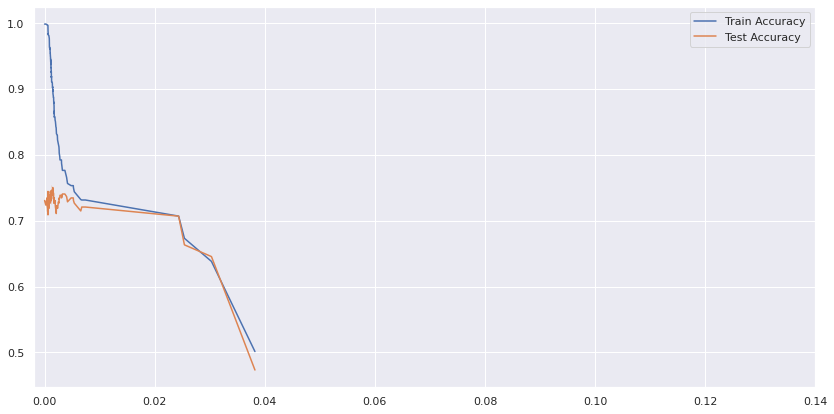

In [ ]:
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y = accuracy_train, x = alphas, label = "Train Accuracy")
sns.lineplot(y = accuracy_test, x = alphas, label = "Test Accuracy")
plt.xticks(ticks = np.arange(0.0,0.15,0.02))
plt.show

In [ ]:
dtree_temp1 =  DecisionTreeClassifier(criterion='entropy', min_samples_split=75, ccp_alpha=0.005)

In [ ]:
dtree_temp1_fit = dtree_temp1.fit(X_train, y_train)
dtree_temp1_train_predict = dtree_temp1.predict(X_train)

dtree_temp1_train_predict_score = accuracy_score(y_train, dtree_temp1_train_predict) *100
dtree_temp1_train_predict_score

76.85185185185185

In [ ]:
search_param_for_decision_tree_1 = {
  "criterion":['gini','entropy'],
  "min_samples_split" : range(2,100),
  "ccp_alpha" : [0.003,0.004,0.005]  
} 


In [ ]:
grid1_1 = GridSearchCV(dtree,search_param_for_decision_tree_1, cv = 10) 
grid1_1.fit (X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'ccp_alpha': [0.003, 0.004, 0.005],
                

In [ ]:
print(f'Grid1_1 {grid1_1.best_params_, grid1_1.best_score_}')

Grid1_1 ({'ccp_alpha': 0.004, 'criterion': 'entropy', 'min_samples_split': 14}, 0.7156151969327292)


In [ ]:
dtree_temp2 =  DecisionTreeClassifier(criterion='entropy', min_samples_split=14, ccp_alpha=0.004)

In [ ]:
dtree_temp2_fit = dtree_temp2.fit(X_train, y_train)
dtree_temp2_train_predict = dtree_temp2.predict(X_train)

dtree_temp2_train_predict_score = accuracy_score(y_train, dtree_temp2_train_predict) *100
dtree_temp2_train_predict_score

82.34126984126983

In [ ]:
dtree_temp2_test_predict = dtree_temp2.predict(X_test)
dtree_temp2_test_predict_score = accuracy_score(y_test, dtree_temp2_test_predict) *100
dtree_temp2_test_predict_score

72.27722772277228

In [ ]:
print(classification_report(y_test, dtree_temp2_test_predict))

              precision    recall  f1-score   support

           0       0.69      0.74      0.72       239
           1       0.75      0.70      0.73       266

    accuracy                           0.72       505
   macro avg       0.72      0.72      0.72       505
weighted avg       0.72      0.72      0.72       505



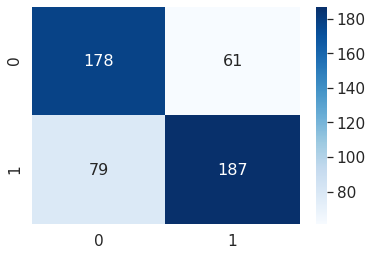

In [ ]:
cm1 = confusion_matrix(y_test, dtree_temp2_test_predict)
df_cm1 = pd.DataFrame(cm1, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm1, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') # font size
plt.show()

In [ ]:
random_forest = RandomForestClassifier()

In [ ]:
random_forest_grid_params ={
    'max_depth' : range(5,60,5),
    'n_estimators' : range(5,60,5)
}

In [ ]:
grid_for_rf_1 = GridSearchCV(random_forest,random_forest_grid_params, cv = 10) 
grid_for_rf_1.fit (X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
grid_for_rf_2 = GridSearchCV(random_forest,random_forest_grid_params, cv = 5) 
grid_for_rf_2.fit (X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
print(f'Grid1 {grid_for_rf_1.best_params_, grid_for_rf_1.best_score_}')
print(f'Grid2 {grid_for_rf_2.best_params_, grid_for_rf_2.best_score_}')

Grid1 ({'max_depth': 30, 'n_estimators': 50}, 0.7877134890205646)
Grid2 ({'max_depth': 20, 'n_estimators': 50}, 0.7837081721417174)


In [ ]:
rf_temp1 =  RandomForestClassifier(max_depth= 25, n_estimators= 30)

In [ ]:
rf_temp1_fit = rf_temp1.fit(X_train, y_train)
rf_temp1_train_predict = rf_temp1.predict(X_train)

rf_temp1_train_predict_score = accuracy_score(y_train, rf_temp1_train_predict) *100
rf_temp1_train_predict_score

99.8015873015873

In [ ]:
rf_temp1_test_predict = rf_temp1.predict(X_test)
rf_temp1_test_predict_score = accuracy_score(y_test, rf_temp1_test_predict) *100
rf_temp1_test_predict_score

76.43564356435644

In [ ]:
print(classification_report(y_test, rf_temp1_test_predict))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       279
           1       0.72      0.77      0.74       226

    accuracy                           0.76       505
   macro avg       0.76      0.76      0.76       505
weighted avg       0.77      0.76      0.76       505



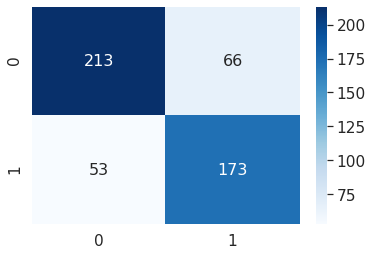

In [ ]:
cm3 = confusion_matrix(y_test, rf_temp1_test_predict)
df_cm3 = pd.DataFrame(cm3, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm3, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') # font size
plt.show()

In [ ]:
rf_temp2 =  RandomForestClassifier(max_depth= 30, n_estimators= 50)

In [ ]:
rf_temp2_fit = rf_temp2.fit(X_train, y_train)
rf_temp2_train_predict = rf_temp2.predict(X_train)

rf_temp2_train_predict_score = accuracy_score(y_train, rf_temp2_train_predict) *100
rf_temp2_train_predict_score

99.86772486772487

In [ ]:
rf_temp2_test_predict = rf_temp2.predict(X_test)
rf_temp2_test_predict_score = accuracy_score(y_test, rf_temp2_test_predict) *100
rf_temp2_test_predict_score

75.04950495049505

In [ ]:
rf_temp3 =  RandomForestClassifier(max_depth= 5, n_estimators= 50)

In [ ]:
rf_temp3_fit = rf_temp3.fit(X_train, y_train)
rf_temp3_train_predict = rf_temp3.predict(X_train)

rf_temp3_train_predict_score = accuracy_score(y_train, rf_temp3_train_predict) *100
rf_temp3_train_predict_score

81.94444444444444

In [ ]:
rf_temp3_test_predict = rf_temp3.predict(X_test)
rf_temp3_test_predict_score = accuracy_score(y_test, rf_temp3_test_predict) *100
rf_temp3_test_predict_score

75.44554455445545

In [ ]:
print(classification_report(y_test, rf_temp3_test_predict))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       279
           1       0.71      0.76      0.73       226

    accuracy                           0.75       505
   macro avg       0.75      0.75      0.75       505
weighted avg       0.76      0.75      0.75       505



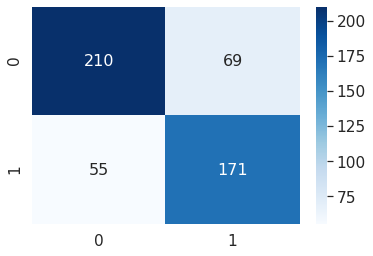

In [ ]:
cm2 = confusion_matrix(y_test, rf_temp3_test_predict)
df_cm2 = pd.DataFrame(cm2, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm2, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') # font size
plt.show()